In [1]:
from init import *
from hytraj import HyTraj, HyGen

autotime loaded.
autotime loaded.
black loaded.
black loaded.
time: 1.67 s


<IPython.core.display.Javascript object>

In [2]:
%watermark -n -u -v -iv -w

Last updated: Thu Jan 07 2021

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

matplotlib: 3.2.2
geopandas : 0.8.1
pandas    : 1.0.5
h5py      : 2.10.0
scipy     : 1.5.0
xarray    : 0.16.1
numpy     : 1.19.4

Watermark: 2.1.0

time: 97.4 ms


<IPython.core.display.Javascript object>

In [3]:
stations = {
    "Boreal Forest": (70, 108),
    "Coastal Tundra": (71, 155),
    "Central Arctic": (90, 0),
    "Greenland": (72, 320),
}

time: 392 µs


<IPython.core.display.Javascript object>

In [4]:
metdir = "/media/pankaj/Repo/arl/ncep/"
odir = "/media/pankaj/Repo/traj/vikash/"
working = "/home/pankaj/phd/code/HyTraj/working/"

time: 311 µs


<IPython.core.display.Javascript object>

In [5]:
met_type = "ncep_new"
height = 500
run_time = -360
years = np.arange(2008, 2020)

for year in years[:1]:
    print("Generating trajectories for %s" % year)
    outdir = odir + "%s/" % year
    if not os.path.exists(outdir):
        os.mkdir(outdir)

    dates = pd.date_range("%s-01-01" % year, freq="24H", end="%s-01-02" % year)
    hy = HyTraj(stations, height, run_time, working, metdir, outdir, met_type)
    data = hy.run(dates, njobs=7)
    data.to_netcdf(
        "/media/pankaj/Repo/traj/vikash/nc/%s.%s.%s.nc" % (year, height, met_type)
    )
    # os.rmdir(outdir)

Generating trajectories for 2008
HySPLIT run over!!!!
time: 16.5 s


<IPython.core.display.Javascript object>

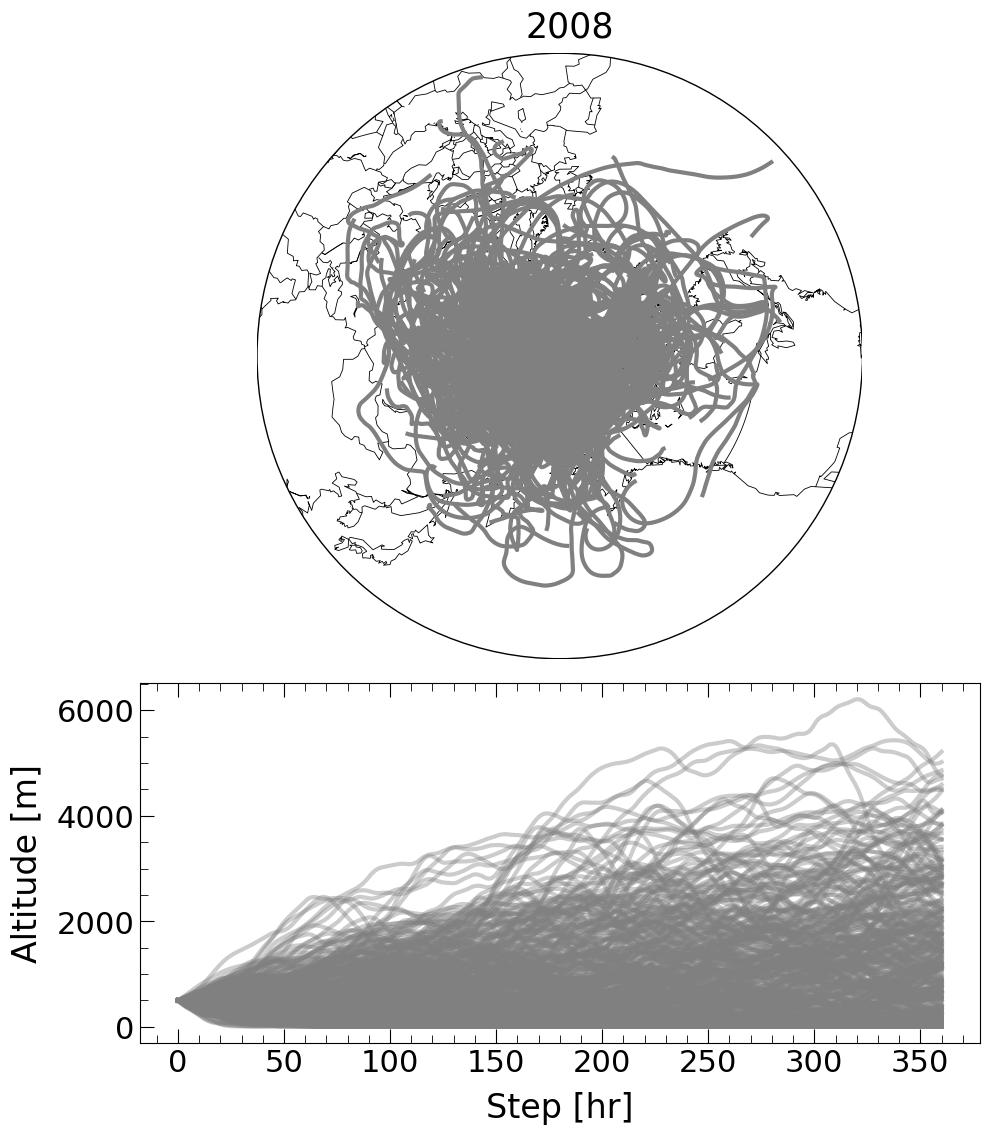

time: 2.39 s


<IPython.core.display.Javascript object>

In [6]:
pad = dict(wspace=0, hspace=0.05, left=0.06, bottom=0.09, right=0.9, top=0.99)
proj = dict(projection="npstere", lon_0=180, boundinglat=30, round=True)
ax = hy.plot(data["Central Arctic"], vertical="alt", show=False, proj=proj, pad=pad)
plt.suptitle(year, y=1.03, x=0.49)
plt.show()